In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Data

In [2]:
#df=pd.read_csv('/kaggle/input/hardik-datasets/plan_data.csv')
df=pd.read_csv('plan_data.csv')
df.head()

,customerID,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies
0,5575-GNVDE,Yes,No,DSL,Yes,No,Yes,No,No,No
1,7795-CFOCW,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
2,9237-HQITU,Yes,No,Fiber optic,No,No,No,No,No,No
3,1452-KIOVK,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No
4,6713-OKOMC,No,No phone service,DSL,Yes,No,No,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        3540 non-null   object
 1   phoneService      3540 non-null   object
 2   multipleLines     3540 non-null   object
 3   internetService   3540 non-null   object
 4   onlineSecurity    3540 non-null   object
 5   onlineBackup      3540 non-null   object
 6   deviceProtection  3540 non-null   object
 7   techSupport       3540 non-null   object
 8   streamingTV       3540 non-null   object
 9   streamingMovies   3540 non-null   object
dtypes: object(10)
memory usage: 276.7+ KB


In [4]:
df.isna().sum()

customerID          0
phoneService        0
multipleLines       0
internetService     0
onlineSecurity      0
onlineBackup        0
deviceProtection    0
techSupport         0
streamingTV         0
streamingMovies     0
dtype: int64

# Data Visualizations

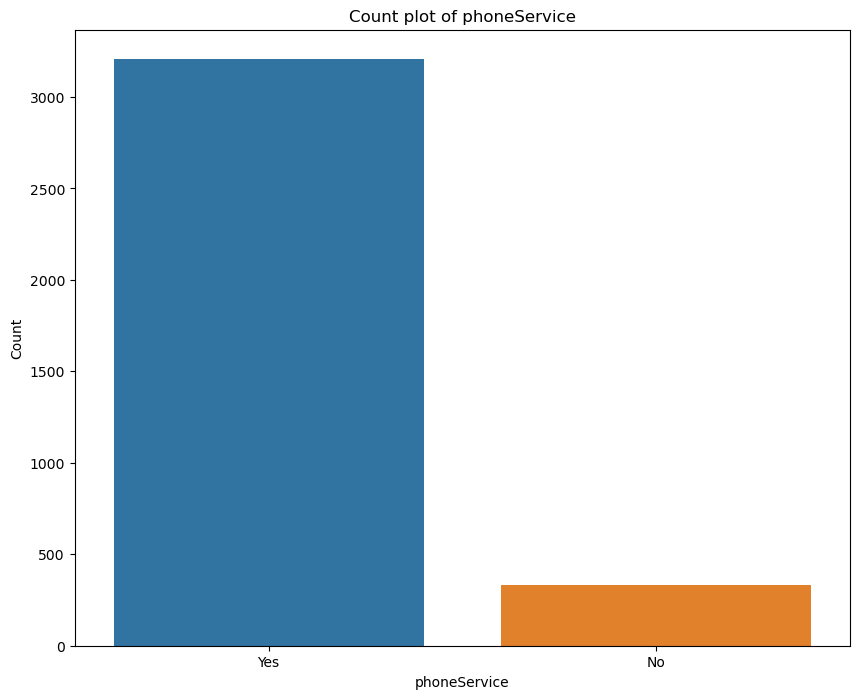

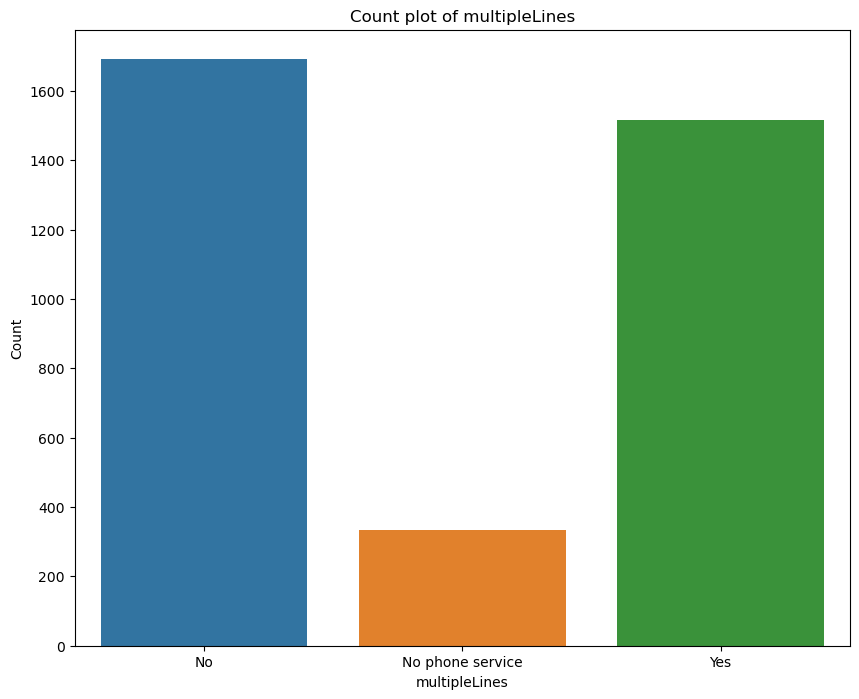

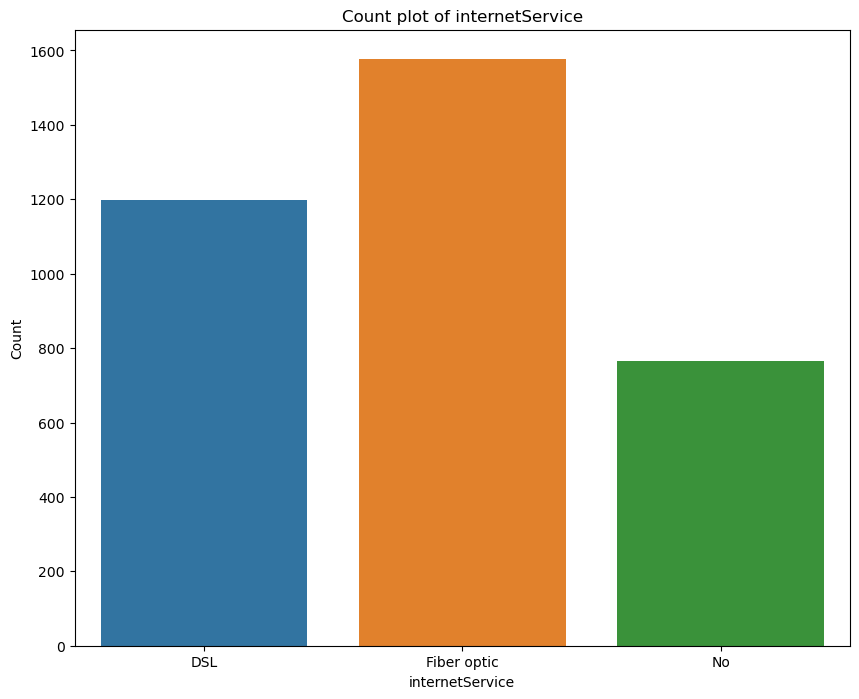

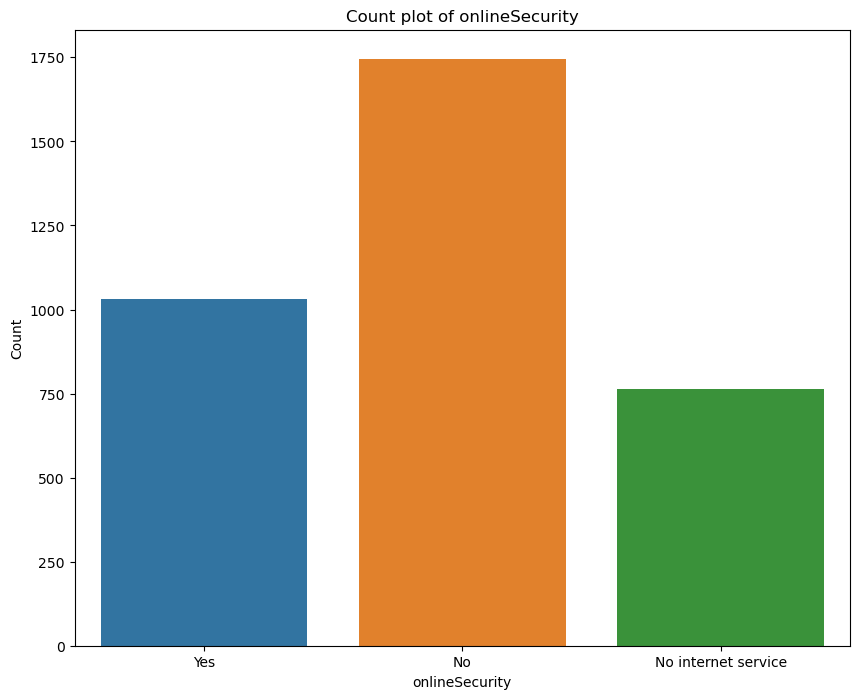

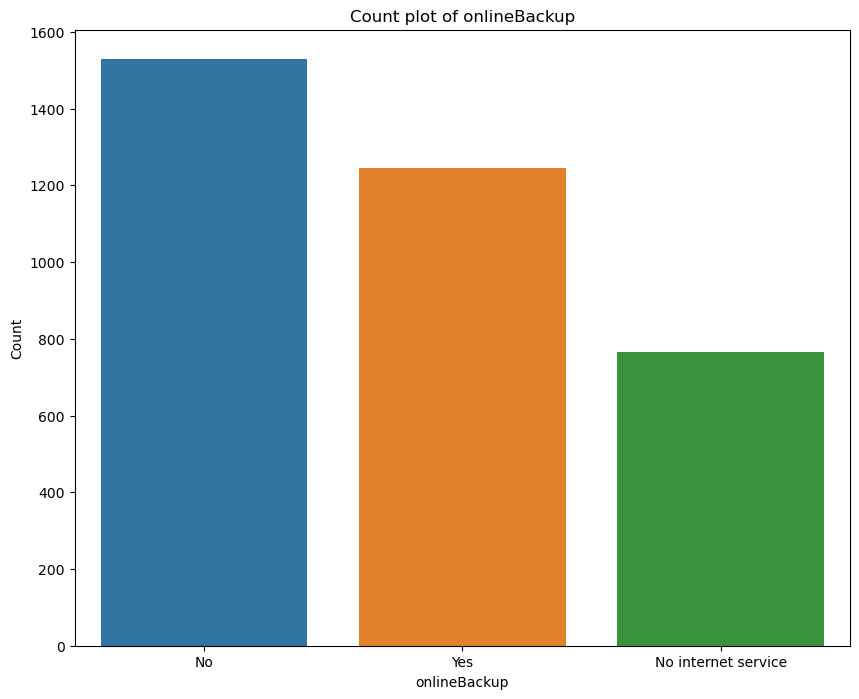

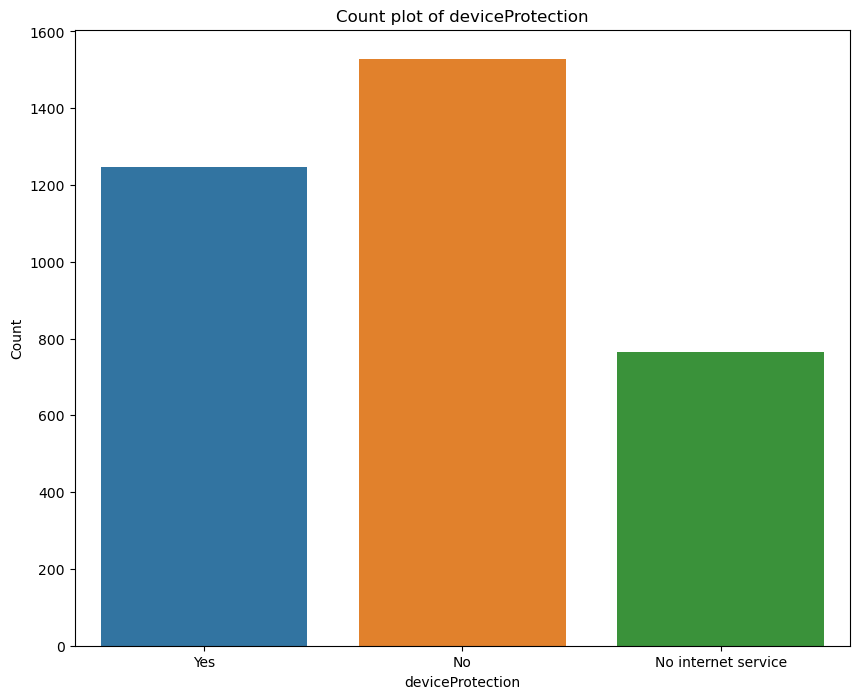

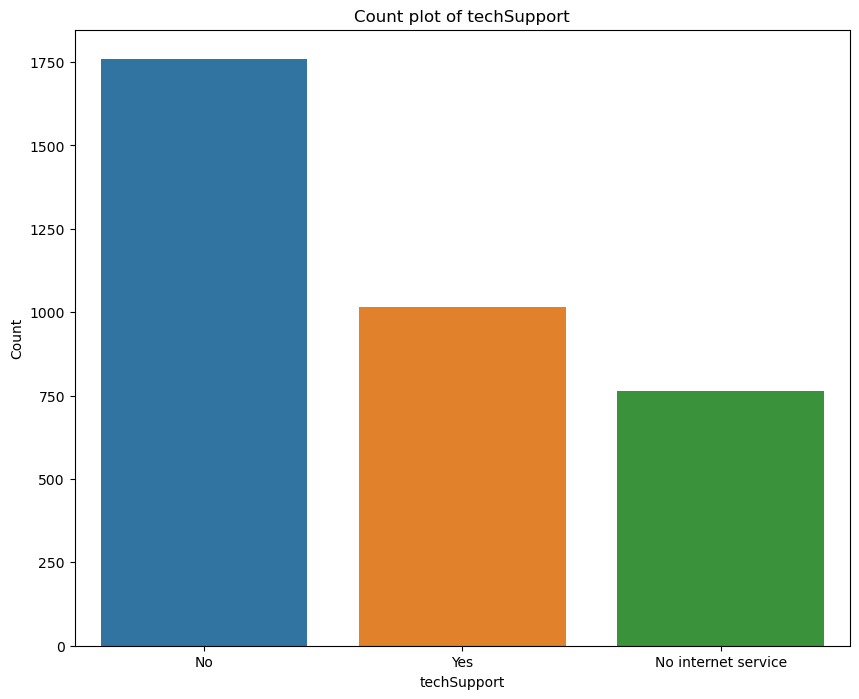

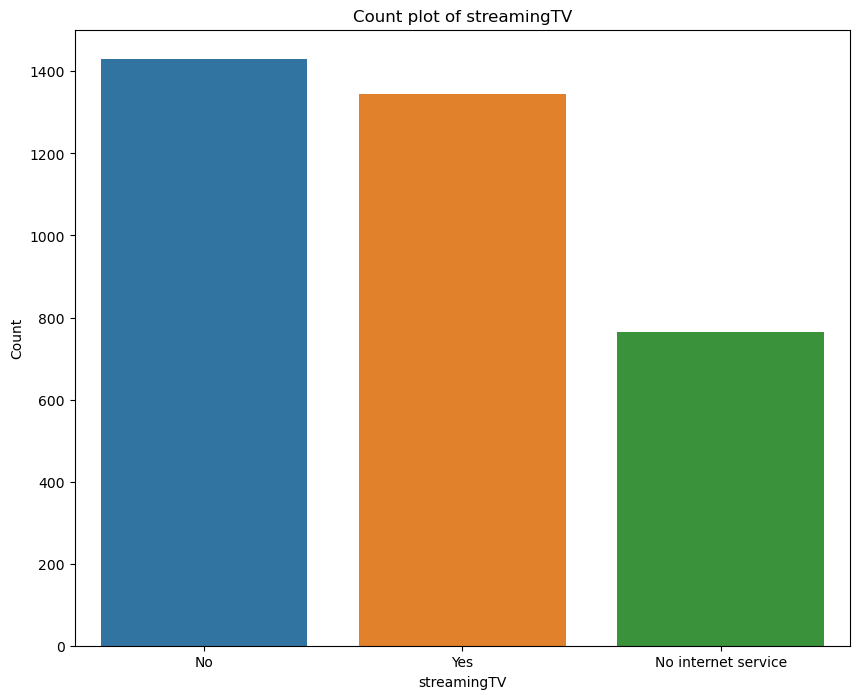

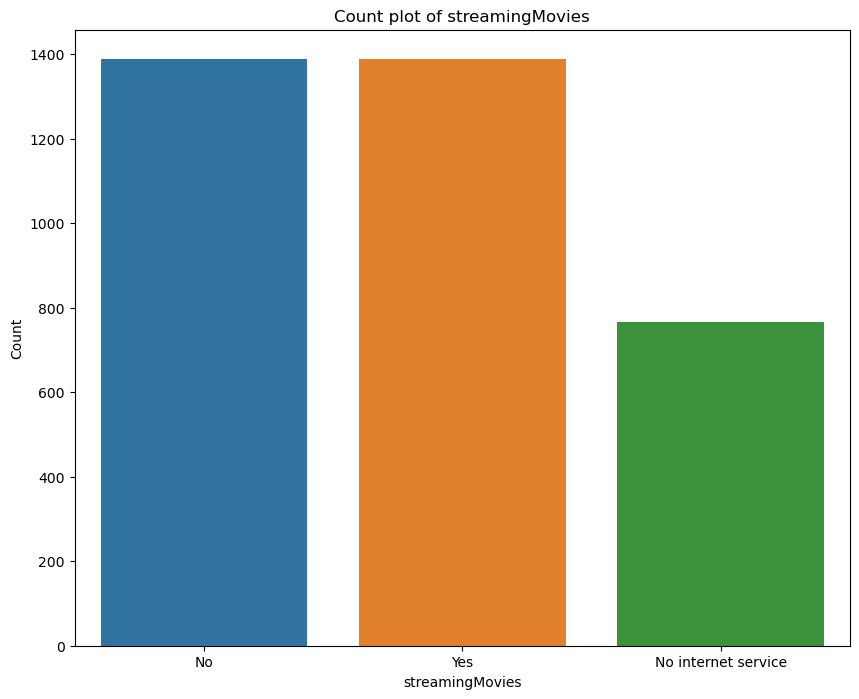

In [5]:
# Plot each categorical variables
for column in df.columns[1:]:
    plt.figure(figsize=(10, 8))
    sns.countplot(data=df, x=column)
    plt.title(f'Count plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

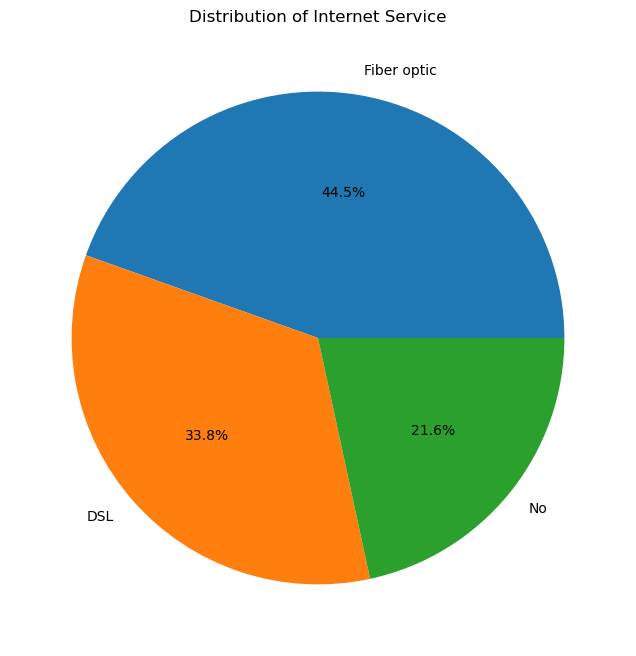

In [6]:
# Pie chart for internetService column
plt.figure(figsize=(10, 8))
df['internetService'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Internet Service')
plt.ylabel('')
plt.show()

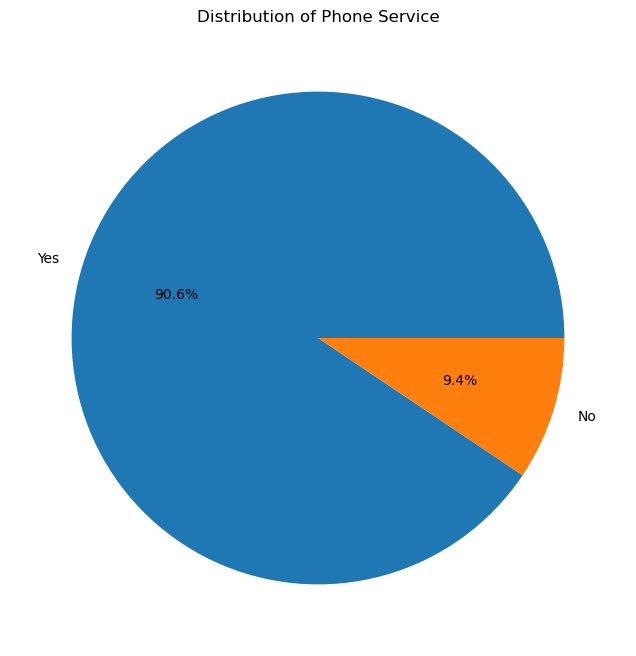

In [7]:
# Pie chart for phoneService column
plt.figure(figsize=(10, 8))
df['phoneService'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Phone Service')
plt.ylabel('')
plt.show()

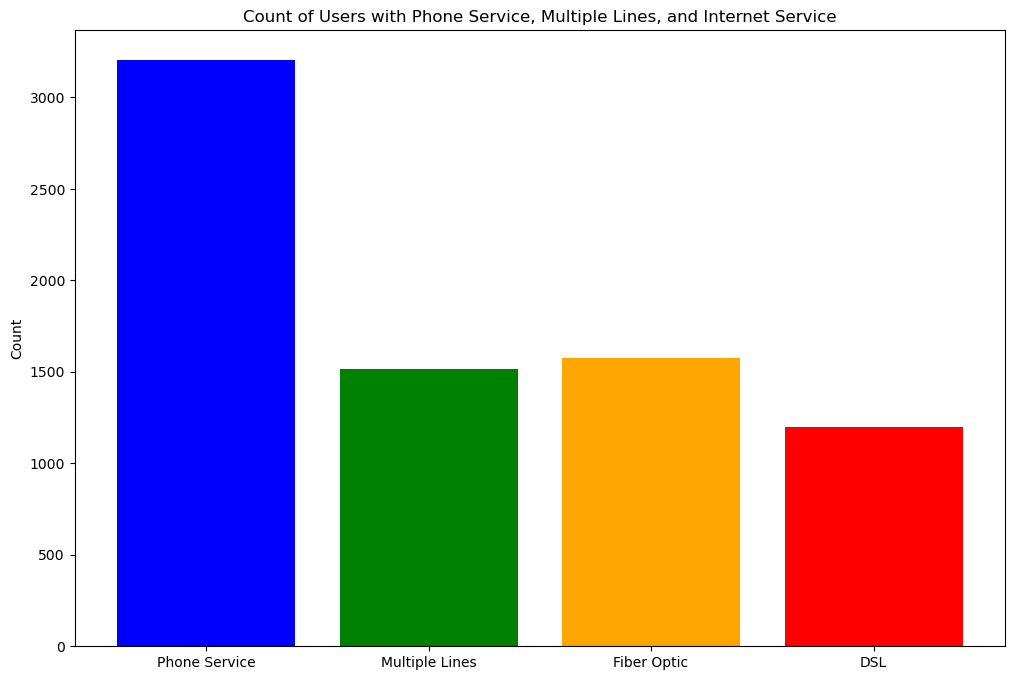

In [8]:
# Create a new column for internet service type
df['internetType'] = df['internetService'].apply(lambda x: 'Fiber Optic' if x == 'Fiber optic' else 'DSL' if x == 'DSL' else 'No Internet')

# Count of customers with each service
phone_service_count = (df['phoneService'] == 'Yes').sum()
multiple_lines_count = (df['multipleLines'] == 'Yes').sum()
fiber_optic_count = (df['internetType'] == 'Fiber Optic').sum()
dsl_count = (df['internetType'] == 'DSL').sum()

# Create the bar plot with colors
fig, ax = plt.subplots(figsize=(12,8))
services = ['Phone Service', 'Multiple Lines', 'Fiber Optic', 'DSL']
counts = [phone_service_count, multiple_lines_count, fiber_optic_count, dsl_count]
colors = ['blue', 'green', 'orange', 'red']  # Define colors for each bar
ax.bar(services, counts, color=colors)  # Add colors to the bars
ax.set_ylabel('Count')
ax.set_title('Count of Users with Phone Service, Multiple Lines, and Internet Service')

plt.show()